### Модели регрессии

#### Цель работы

Познакомиться с основными приемами работы с моделями регрессии в scikit-learn.

#### Задания для выполнения

1. Загрузите встроенные датасет о ценах на недвижимость в Калифорнии.
3. Постройте модель регрессии для предсказания цены конкретного объекта.
4. Оцените качество построенной модели с помощью визуализации и коэффициента детерминации.
5. Постройте альтернативную полиномиальную модель, сравните ее с предыдущей.

#### Методические указания

В качестве исходных данных будем использовать датасет о ценах на объекты недвижимости в Калифорнии. Это один из известных обучающих наборов данных. Он встроен в библиотеку _sklearn_, так что его не нужно загружать или скачивать отдельно. Для начала работы импортируем стандартные необходимые библиотеки:


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
import sklearn
from sklearn.linear_model import LinearRegression

In [6]:
california = fetch_california_housing()

In [8]:
type(california)

sklearn.utils._bunch.Bunch

In [9]:
#Это специальный тип данных библиотеки _sklearn_, который похож по своему устройству на обычный словарь. Поэтому посмотрим, какие ключи есть в этом словаре:

sklearn.utils.Bunch

sklearn.utils._bunch.Bunch

In [10]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [11]:
# Особый интерес здесь представляют поля _data_ и _target_, которые содержат именно исходные атрибуты и вектор значений целевой переменной. Выведем их тип:

print(type(california.data), type(california.target))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
# Посмотрите форму массивов

In [12]:
print(california.data.shape, california.target.shape)

(20640, 8) (20640,)


Теперь с данными можно работать разными способами. Для удобства анализа мы объединим все массивы в датафрейм:


In [ ]:
data = pd.DataFrame(california.data, columns = california.feature_names)
data['Price'] = california.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Нужна ли дополнительная предобработка данных?

In [ ]:
data.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


In [ ]:
# Теперь выделим целевую переменную и факторы:
y = data['Price']
X = data.drop('Price', axis=1)

Приступим к обучению и оценке качества модели. Из набора линейных моделей библиотеки _sklearn_ импортируем линейную регрессию:

In [ ]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

выведем коэффициенты модели, так как в линейных моделях они имеют некоторый смысл:

In [ ]:
print("Coefficients: \n", model.coef_)

Coefficients: 
 [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]


In [ ]:
#Выведем коэффициенты вместе с названиями соответствующих атрибутов:

_ = [print(k, v) for k, v in zip(X.columns, model.coef_)]

MedInc 0.4366932931343245
HouseAge 0.009435778033237972
AveRooms -0.10732204139090447
AveBedrms 0.645065693519812
Population -3.976389421211576e-06
AveOccup -0.003786542654971
Latitude -0.42131437752714385
Longitude -0.43451375467477743


Проанализируйте эти данные вместе с интерпретацией атрибутов датасетов и сделайте вывод о том, какие факторы как влияют на цену недвижимости в Калифорнии.

MedInc (0.437): Положительный коэффициент. Увеличение медианного дохода на единицу приводит к повышению цены на дом на 0.437.

HouseAge (0.009): Возраст дома почти не влияет на цену.

AveRooms (-0.107): Отрицательный коэффициент. Увеличение среднего количества комнат снижает цену.

AveBedrms (0.645): Положительный коэффициент. Большее количество спален увеличивает стоимость.

Population (-3.98e-06): Очень малое влияние населения.

AveOccup (-0.004): Слабое отрицательное влияние средней занятости.

Latitude (-0.421) и Longitude (-0.435): Географические координаты существенно влияют на цену. Значит, есть региональные различия в стоимости недвижимости.

In [ ]:
#Как и в модели линейной регрессии, данный вектор не включает в себя свободный коэффициент. Он хранится в отдельном поле класса:

print("Intercept: \n", model.intercept_)

Intercept: 
 -36.94192020718441


Сделаем предсказания модели и выведем на экран первые несколько точек:

In [ ]:
y_pred = model.predict(X)
print(y_pred[:5])

[4.13164983 3.97660644 3.67657094 3.2415985  2.41358744]


In [ ]:
#Для сравнения выведем реальные соответствующие значения целевой переменной:

print(y[:5])

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64


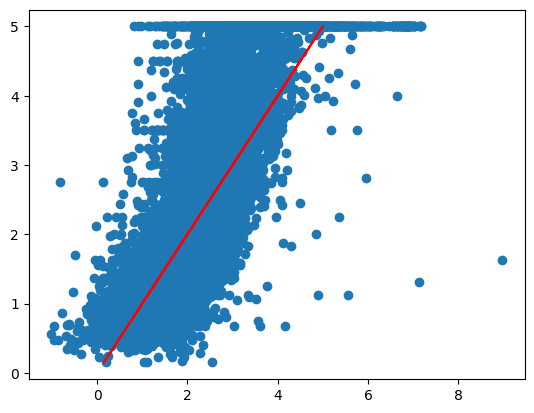

In [ ]:
#Конечно, так анализировать данные неудобно. Лучше построить график, демонстрирующий связь между реальными и предсказанными значениями целевой переменной:

plt.scatter(y_pred, y)
plt.plot(y, y, c='r')

На этом графике чем ближе точки к центральной линии, тем более точные прогнозы делает модель.
В данном случае разброс довольно велик. Чтобы оценить эффективность модели численно, опять обратимся к встроенной метрике, реализованной методом _score_ - коэффициенту детерминации:

In [ ]:
model.score(X, y)

0.606232685199805

Дайте интерпретацию коэффициента детерминации для модели

Коэффициент детерминации 0.606 означает, что 60.6% изменчивости цен на недвижимость объясняется построенной линейной моделью. Модель объясняет большую часть изменчивости, но наверняка можно лучше.

Давайте попробуем построить другую модель - полиномиальную регрессию. Есть надежда, что введение полиномиальных признаков может существенно увеличить точность модели:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5).fit_transform(X)

In [ ]:
#В данном случае используем полиномиальные признаки пятой степени. Вы можете поэкспериментировать с другими степенями полинома. Построим предсказание для анализа:


polynomial = LinearRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

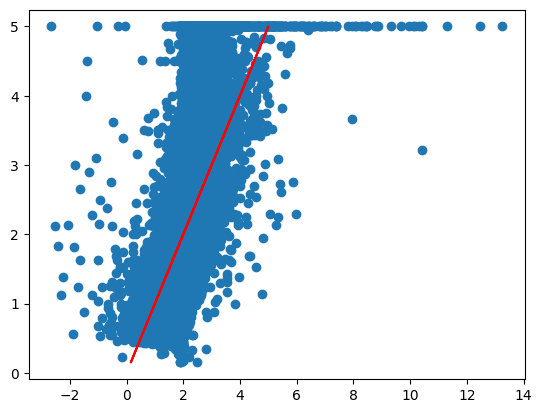

In [ ]:
#По этим данным можно построить график, подобный предыдущему:

plt.scatter(y_pred_poly, y)
plt.plot(y, y, c='r')

In [ ]:
polynomial.score(poly, y)

0.3662918015456289

#### Контрольные вопросы

1. Чем отличается применение разных моделей регрессии в бибилиотеке _sklearn_ от моделей классфикации?
1. Что показывает коэффициент детерминации для модели регрессии?
1. Какое значение имеют коэффициенты линейной регрессии?
1. Какие атрибуты имеет объект линейной регрессии?

1.

Ключевое отличие заключается в типе решаемой задачи:

Модели регрессии используются для прогнозирования непрерывных числовых значений.

Модели классификации используются для прогнозирования дискретной категории или метки.

Соответственно, для этих двух типов моделей используются разные метрики для оценки качества:

Для регрессии: mean_squared_error (среднеквадратичная ошибка), r2_score (коэффициент детерминации).

Для классификации: accuracy_score (точность), precision_score, recall_score.

Таким образом, разница в применении заключается в выборе подходящего класса модели и метрик оценки в зависимости от того, является ли целевая переменная числовой (регрессия) или категориальной (классификация).

2.

Это процент успеха нашей модели от 0% до 100%:

R^2 = 1.0 (100%) — идеальное предсказание, модель угадывает всё точно

R^2 = 0.8 (80%) — очень хорошая модель, объясняет 80% изменений

R^2 = 0.5 (50%) — средняя модель

R^2 = 0 — модель не работает вообще

R^2 < 0 — модель предсказывает хуже, чем просто взять среднее значение

Чем ближе к 1, тем лучше модель.

3.

В уравнении линейной регрессии y = w0 + w1*х1 + w2*x2 + ... + wn*xn коэффициенты имеют следующую интерпретацию:

w0 (intercept или свободный член): Это базовый уровень целевой переменной y. Он показывает ожидаемое значение y, когда все независимые переменные x1, x2, ..., xn равны нулю.

w1, w2, ..., wn (coefficients или веса признаков): Эти коэффициенты quantify влияние каждого признака на целевую переменную.

Знак коэффициента указывает на направление этого влияния:

Положительный коэффициент: Увеличение признака x_i приводит к увеличению целевой переменной y.

Отрицательный коэффициент: Увеличение признака x_i приводит к уменьшению целевой переменной y.

Абсолютное значение коэффициента показывает силу влияния. При прочих равных условиях, признак с большим абсолютным значением коэффициента оказывает более сильное воздействие на прогноз.

4.

.coef_ — массив (vector) коэффициентов w1, w2, ..., wn для каждого признака. Каждый элемент массива соответствует весу одного из признаков в модели.

.intercept_ — скалярное значение, представляющее свободный член w0.

Эти атрибуты позволяют получить параметры обученной модели и, например, вручную рассчитать прогнозы по уравнению линейной регрессии.

#### Задания для самостоятельного выполнения

1. Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.
2. Попробуйте применить к той же задаче другие модели регрессии. Для каждой из них выведите визуализацию регрессии и оценку точности. Рекомендуется исследовать следующие модели:  
    2.1. Метод опорных векторов  
        1) Без ядра  
        2) С гауссовым ядром  
        3) С полиномиальным ядром    
    2.2. (\*) Другие методы:  
        1) Гребневую регрессию  
        2)  Регрессию Лассо  
        3)  Регрессию ElasticNet  
        4)  Беггинг  
        5)  Другие модели по желанию  
1. Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.
1. Повторите полностью анализ для другого набора данных - встроенного в _sklearn_ датасета _diabetes_.

1

Для обученной модели можно вывести информацию о возрасте дома и построить модель регрессии для предсказания возраста конкретного дома.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
import sklearn
from sklearn.linear_model import LinearRegression

In [15]:
california = fetch_california_housing()

In [16]:
data = pd.DataFrame(california.data, columns = california.feature_names)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [18]:
#по примеру кода из методички

y = data['HouseAge']
X = data.drop('HouseAge', axis = 1) #факторы

In [19]:
#импортируем линейную регрессию

model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
#выделяем коэффициенты модели

print("Coefficients: \n", model.coef_)

Coefficients: 
 [-9.61390806e-01 -5.86753291e-01  1.33079007e+00 -3.40874847e-03
  4.91891136e-02 -4.16646881e+00 -4.63326025e+00]


In [21]:
_ = [print(k, v) for k, v in zip(X.columns, model.coef_)]

MedInc -0.9613908064058245
AveRooms -0.5867532912968123
AveBedrms 1.3307900748843675
Population -0.0034087484681539627
AveOccup 0.04918911357493954
Latitude -4.166468812951675
Longitude -4.633260252548662


In [22]:
print("Intercept: \n", model.intercept_)

Intercept: 
 -366.74371778228533


In [23]:
#предсказание модели

y_pred = model.predict(X)
print(y_pred[:5])

[30.04267807 23.36244901 29.9605156  32.78419513 34.20795764]


In [24]:
print(y[:5])

0    41.0
1    21.0
2    52.0
3    52.0
4    52.0
Name: HouseAge, dtype: float64


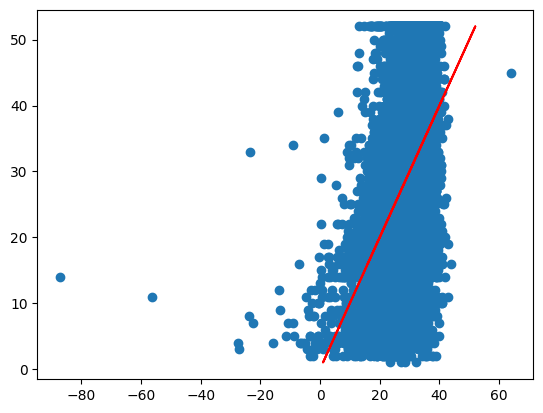

In [25]:
plt.scatter(y_pred, y)
plt.plot(y, y, c='r')

Чем ближе точки к центральной линии, тем более точные прогнозы делает модель. В данном случае разброс довольно велик. Чтобы оценить эффективность модели численно, обратимся к коэффициенту детерминации:

In [26]:
model.score(X, y)

0.19436319660682222

In [28]:
#Полиномиальная модель

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2).fit_transform(X)

Разберем с другой степенью = 2.

In [30]:
polynomial = LinearRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

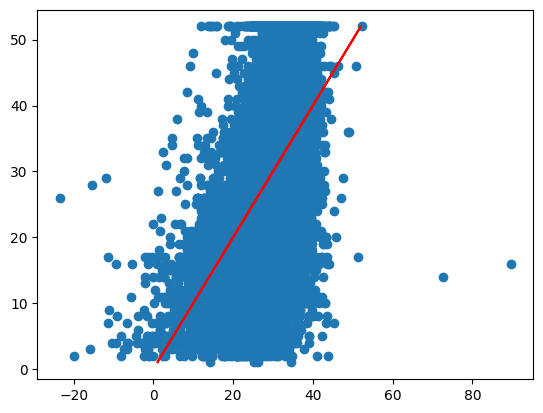

In [31]:
#построим график

plt.scatter(y_pred_poly, y)
plt.plot(y, y, c='r')

In [32]:
polynomial.score(poly, y)

0.2462274155673848

2

In [33]:
#загрузка данных

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score

california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
y = data['HouseAge']
X = data.drop('HouseAge', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

1: Метод опорных векторов (без ядра)

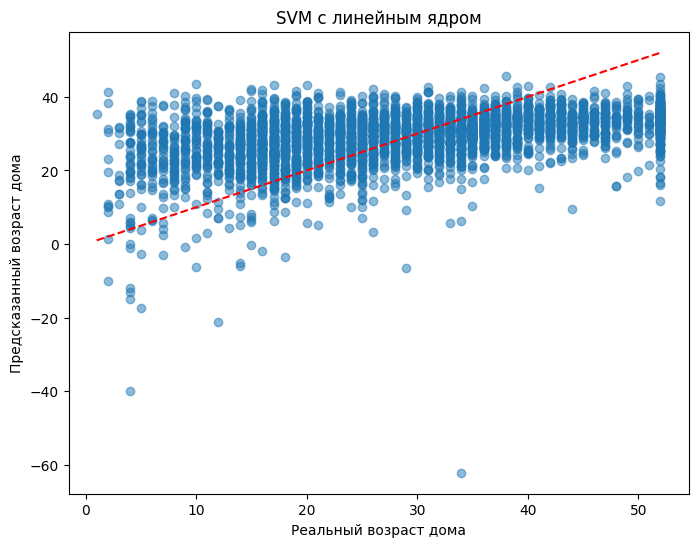

Точность (R²): 0.1830


In [35]:
svm_linear = SVR(kernel='linear')
svm_linear.fit(X_train_scaled, y_train)
y_pred_linear = svm_linear.predict(X_test_scaled)
score_linear = svm_linear.score(X_test_scaled, y_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Реальный возраст дома')
plt.ylabel('Предсказанный возраст дома')
plt.title('SVM с линейным ядром')
plt.show()

print(f"Точность (R²): {score_linear:.4f}")

2: Метод опорных векторов (с гауссовым ядром)

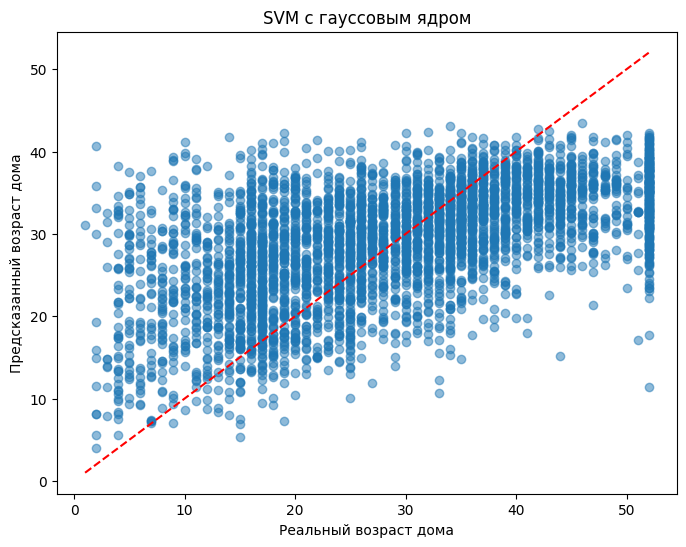

Точность (R²): 0.3140


In [36]:
svm_rbf = SVR(kernel='rbf')
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)
score_rbf = svm_rbf.score(X_test_scaled, y_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rbf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Реальный возраст дома')
plt.ylabel('Предсказанный возраст дома')
plt.title('SVM с гауссовым ядром')
plt.show()

print(f"Точность (R²): {score_rbf:.4f}")

3: Метод опорных векторов (с полиномиальным ядром)

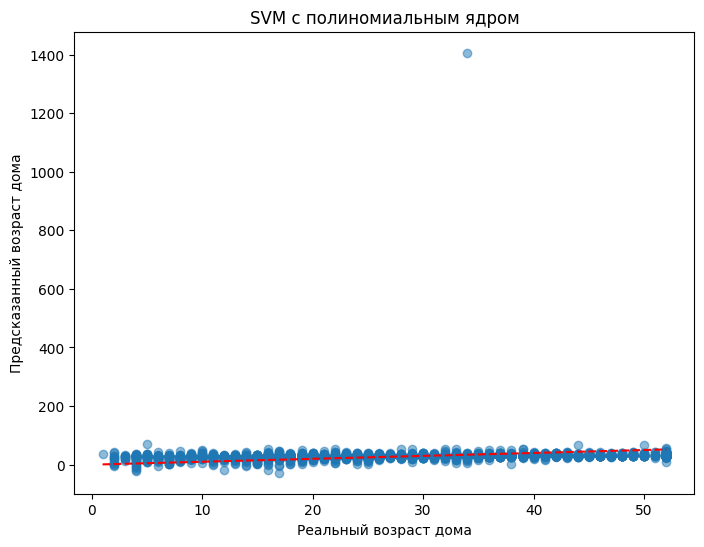

Точность (R²): -2.7467


In [37]:
svm_poly = SVR(kernel='poly', degree=3)
svm_poly.fit(X_train_scaled, y_train)
y_pred_poly = svm_poly.predict(X_test_scaled)
score_poly = svm_poly.score(X_test_scaled, y_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Реальный возраст дома')
plt.ylabel('Предсказанный возраст дома')
plt.title('SVM с полиномиальным ядром')
plt.show()

print(f"Точность (R²): {score_poly:.4f}")

Сравнение всех моделей:

In [38]:
print(f"SVM линейное ядро: {score_linear:.4f}")
print(f"SVM гауссово ядро: {score_rbf:.4f}")
print(f"SVM полиномиальное ядро: {score_poly:.4f}")

SVM линейное ядро: 0.1830
SVM гауссово ядро: 0.3140
SVM полиномиальное ядро: -2.7467


3.

In [44]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# Загружаем дома
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
y = data['HouseAge']
X = data.drop('HouseAge', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создаем словарь моделей
models = {
    'SVM_Linear': SVR(kernel='linear'), # С линейным ядром
    'SVM_RBF': SVR(kernel='rbf'), # Гауссово ядро
    'SVM_Poly': SVR(kernel='poly', degree=3) # Полином 3 степени
}

# Обучаем все модели и смотрим результаты
print("Сравнение SVM моделей ")
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    score = r2_score(y_test, y_pred)
    if name == 'SVM_Linear':
        print(f"Модель с линейным ядром R^2 = {score:.4f}")
    if name == 'SVM_RBF':
        print(f"Модель с гауссовым ядром R^2 = {score:.4f}")
    if name == 'SVM_Poly':
       print(f"Модель с полиномиальным ядром R^2 = {score:.4f}")

Сравнение SVM моделей 
Модель с линейным ядром R^2 = 0.1830
Модель с гауссовым ядром R^2 = 0.3140
Модель с полиномиальным ядром R^2 = -2.7467


4.

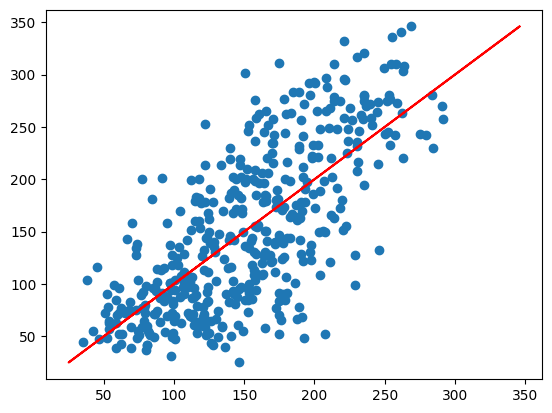

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_diabetes
import sklearn
from sklearn.linear_model import LinearRegression

diabetes = load_diabetes()
data = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
data['Price'] = diabetes.target
data.head()

y = data['Price']
X = data.drop('Price', axis=1)
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.scatter(y_pred, y)
plt.plot(y, y, c='r')

In [41]:
model.score(X, y)

0.5177484222203498

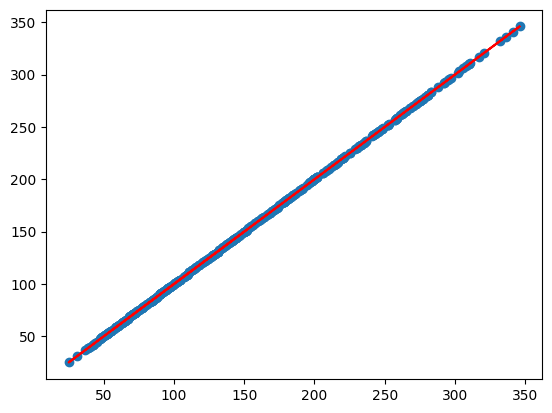

In [42]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5).fit_transform(X)

polynomial = LinearRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

plt.scatter(y_pred_poly, y)
plt.plot(y, y, c='r')

In [43]:
polynomial.score(poly, y)

1.0